# Basic Data Visualisation

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [3]:
%config InlineBackend.figure_format = 'retina'

In [5]:
sales_data = pd.read_excel('../pandas/data/blooth_sales_data_clean.xlsx' )
sales_data.head(5)
sales_data['turnover'] = sales_data['unitprice'] * sales_data['units']

sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


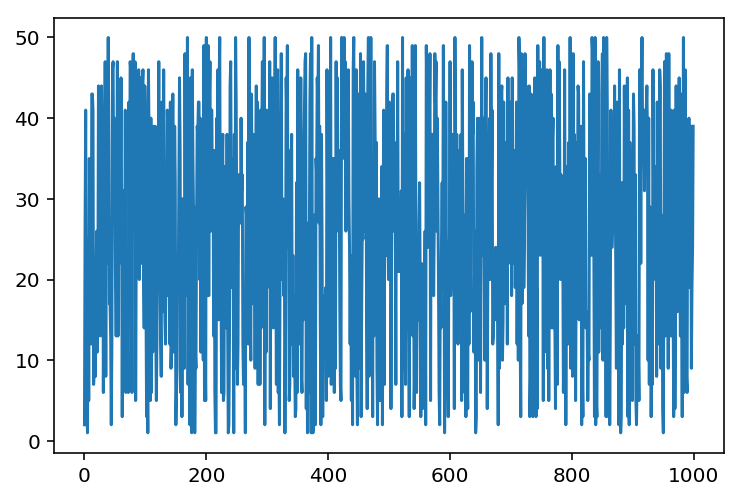

In [6]:
sales_data['units'].plot()
# pandas will interact with matplotlib  - default is linechart

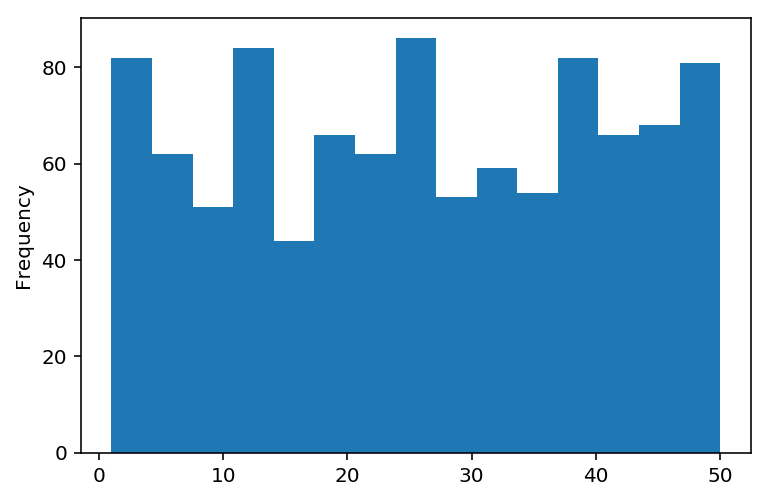

In [7]:
sales_data['units'].plot.hist(bins=15);

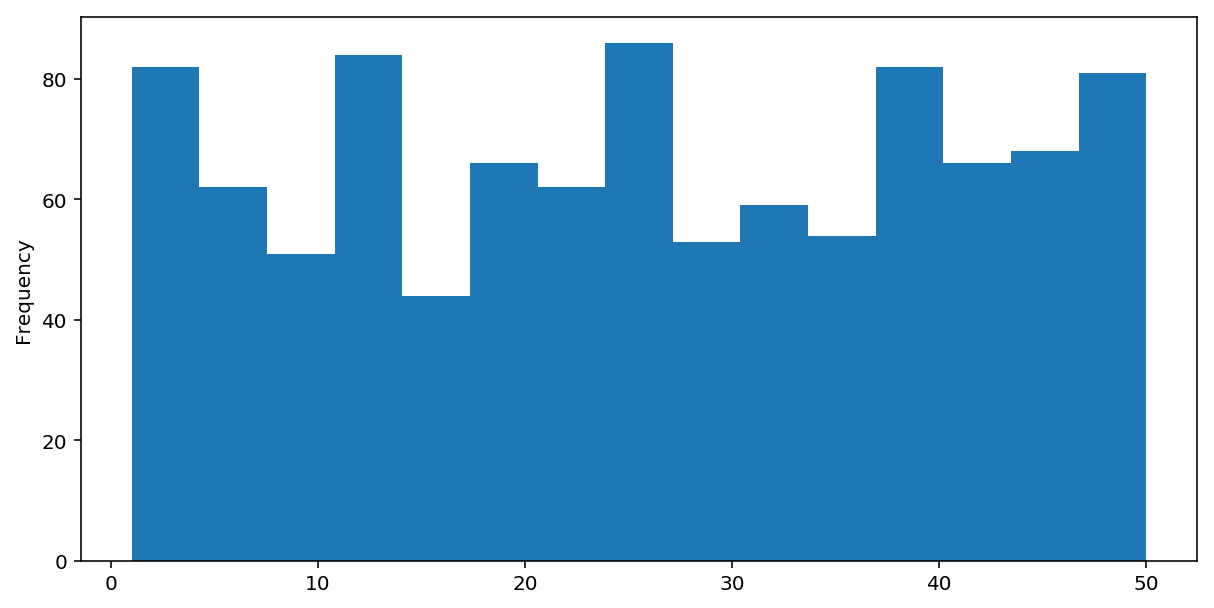

In [8]:
sales_data['units'].plot.hist(bins=15,
                             figsize=(10,5));

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [10]:
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

Matplotlib colormaps [Webseite](https://matplotlib.org/examples/color/colormaps_reference.html)

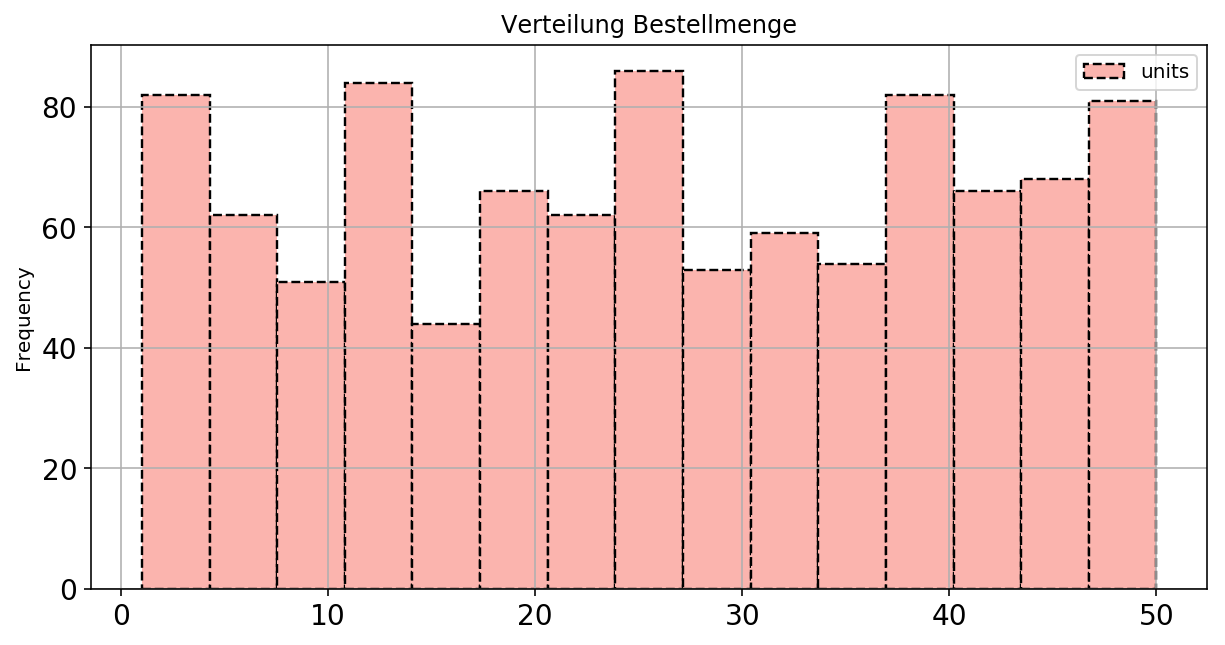

In [11]:
sales_data['units'].plot.hist(
    bins=15, 
    title="Verteilung Bestellmenge",
    legend=True,
    fontsize=14,
    colormap='Pastel1',
    grid=True,
    linestyle='--',
    edgecolor='black', 
    linewidth=1.2
);

In [12]:
sales_data['units_bin'] = sales_data['units'].apply(lambda x: np.int(np.ceil(x*15/50)))

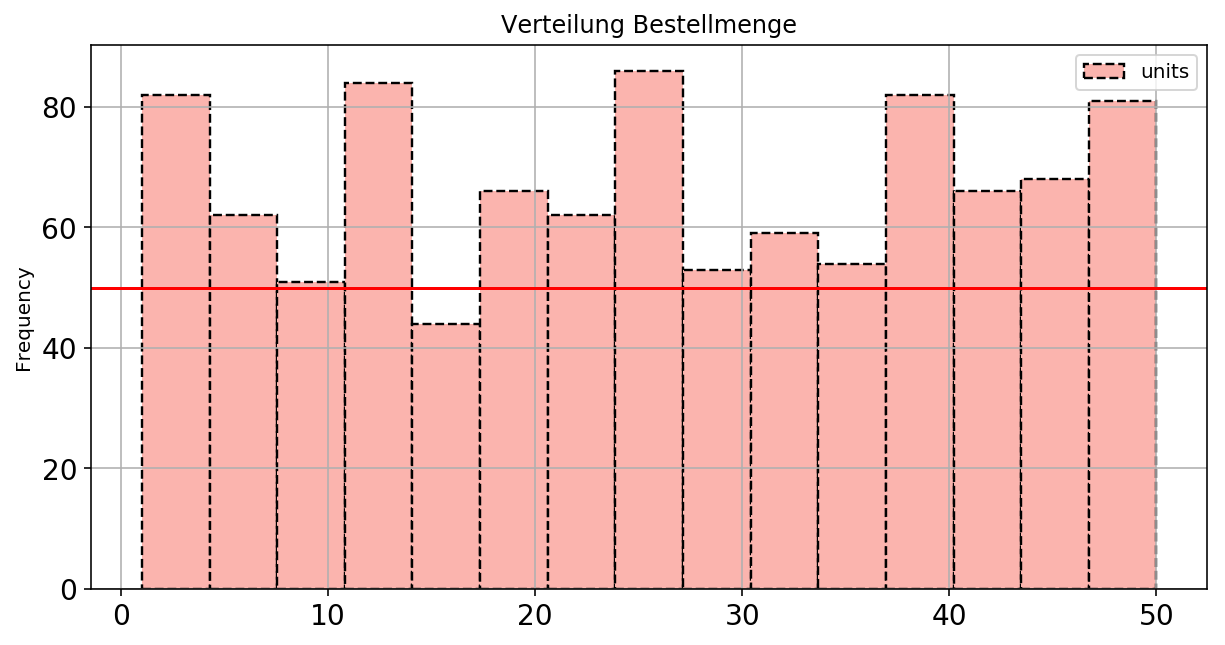

In [13]:
ax = sales_data['units'].plot.hist(
    bins=15, 
    title="Verteilung Bestellmenge",
    legend=True,
    fontsize=14,
    colormap='Pastel1',
    grid=True,
    linestyle='--',
    edgecolor='black', 
    linewidth=1.2
);
ax.axhline(sales_data['units'].max(), color='red', linestyle='-');

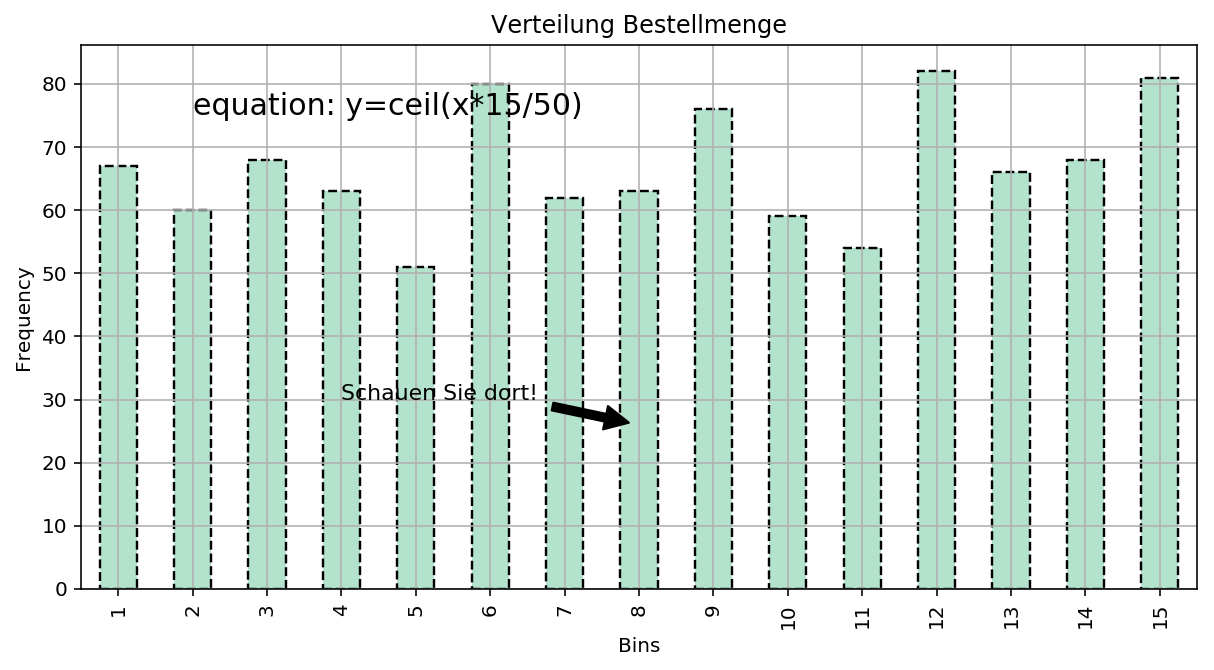

In [14]:
ax = sales_data.groupby('units_bin').count()['units'].plot.bar(
    title="Verteilung Bestellmenge",
    colormap='Pastel2',
    grid=True,
    linestyle='--',
    edgecolor='black', 
    linewidth=1.2
);
ax.set_xlabel('Bins')
ax.set_ylabel('Frequency')
ax.text(1, 75, r'equation: y=ceil(x*15/50)', fontsize=15)
ax.annotate('Schauen Sie dort!', xy=(7, 26), xytext=(3, 30),
            arrowprops=dict(facecolor='black', shrink=0.1), fontsize=11);

In [15]:
tt = sales_data[['product', 'turnover']].groupby('product').sum()
tt

,turnover
product,
Corolla,53191480.51
Harry Potter book,51673.67
Lipitor,25435.05
PlayStation,718578.51
Rubik’s Cube,44957.49
Star Wars,28329.24
Thriller record,33806.96
banana,25690.00
iPad,2028467.59


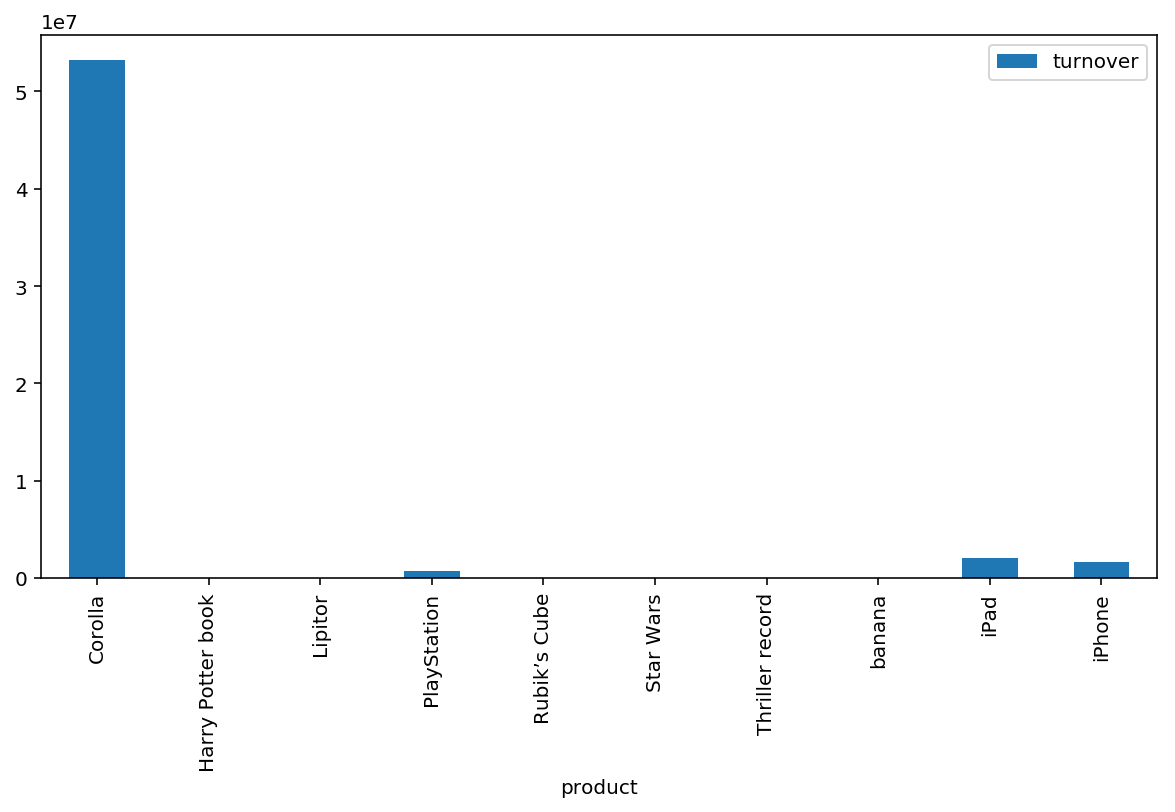

In [16]:
tt.plot.bar();

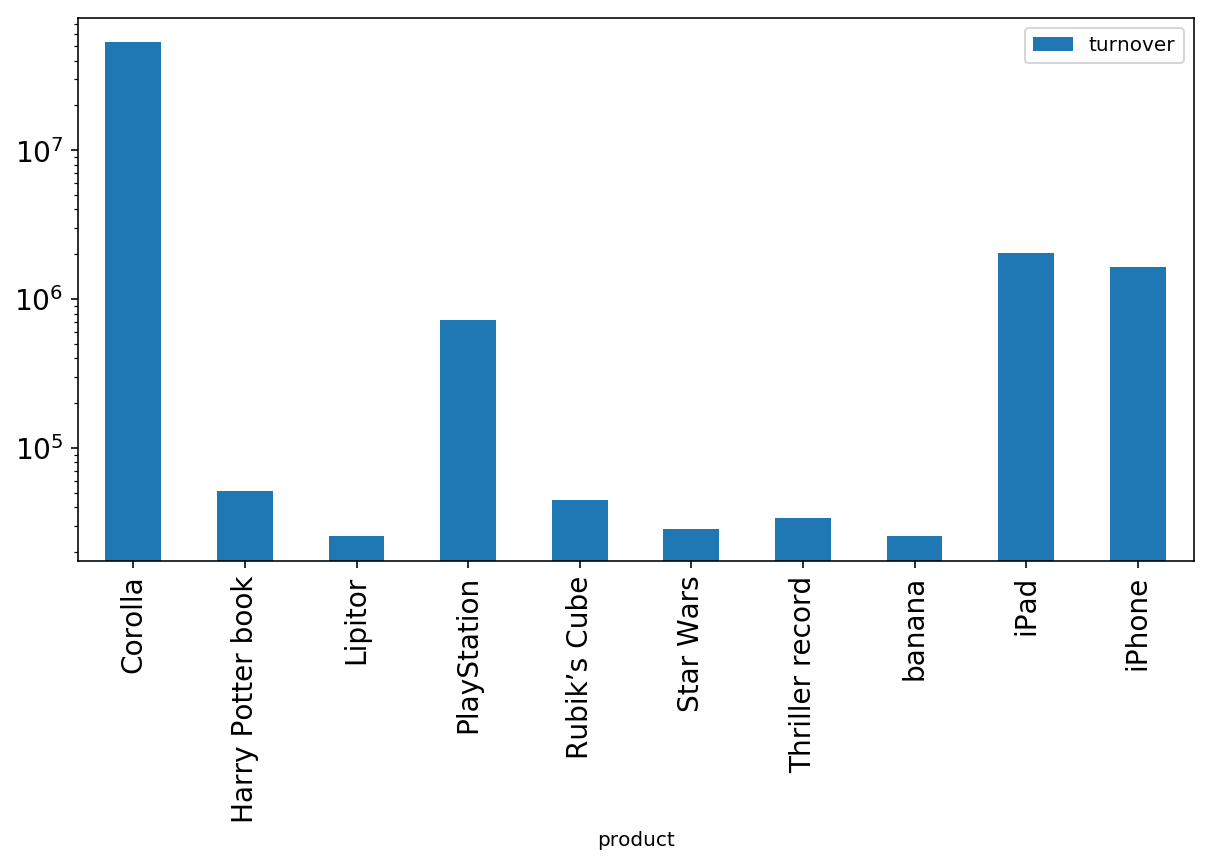

In [17]:
tt.plot.bar(logy=True, fontsize=14);

---

#### Excecise

In [18]:
product_sum = sales_data[['product', 'units']].groupby('product').sum()
product_sum

,units
product,
Corolla,2389
Harry Potter book,2647
Lipitor,2325
PlayStation,2862
Rubik’s Cube,2654
Star Wars,2827
Thriller record,2312
banana,2569
iPad,2772


Create a barchart and customize three alements of your choice

In [ ]:
# your code here


In [ ]:
# %load ../pandas/solutions/401.py


---

### Seaborn

Seaborn is based on matplotlib and provides a more *modern* style. 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Histogram

/Users/valerio/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


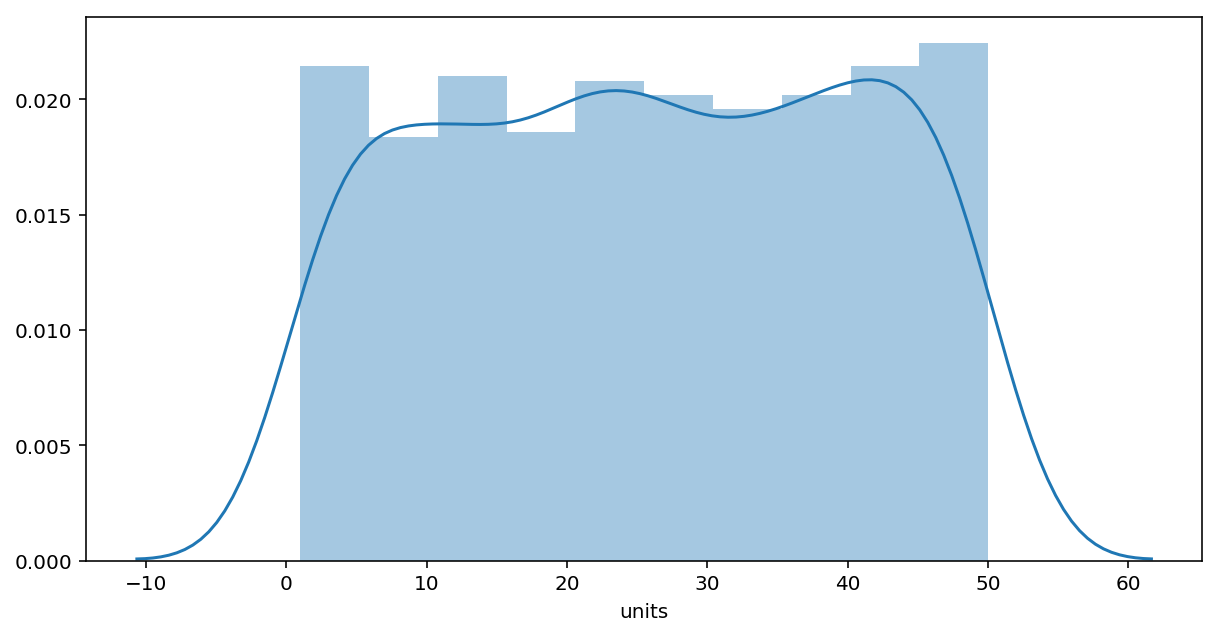

In [21]:
sns.distplot(sales_data['units']);

In [22]:
# For demonstration purposes we now use a subset of the dataset
sales_data['weekday'] = sales_data['orderdate'].map(lambda x: x.weekday())
sales_50 = sales_data[sales_data['unitprice']<50][['units', 'turnover', 'product', 'weekday']]
sales_50

,units,turnover,product,weekday
0,2,26.54,Thriller record,6
2,41,647.39,Rubik’s Cube,4
4,4,102.76,Harry Potter book,5
5,1,11.22,Lipitor,4
7,5,91.35,Thriller record,5
8,35,559.30,Rubik’s Cube,4
9,24,276.00,Star Wars,1
10,27,218.43,Star Wars,4
16,9,106.65,Star Wars,3
18,8,149.12,Thriller record,2


Density Plot

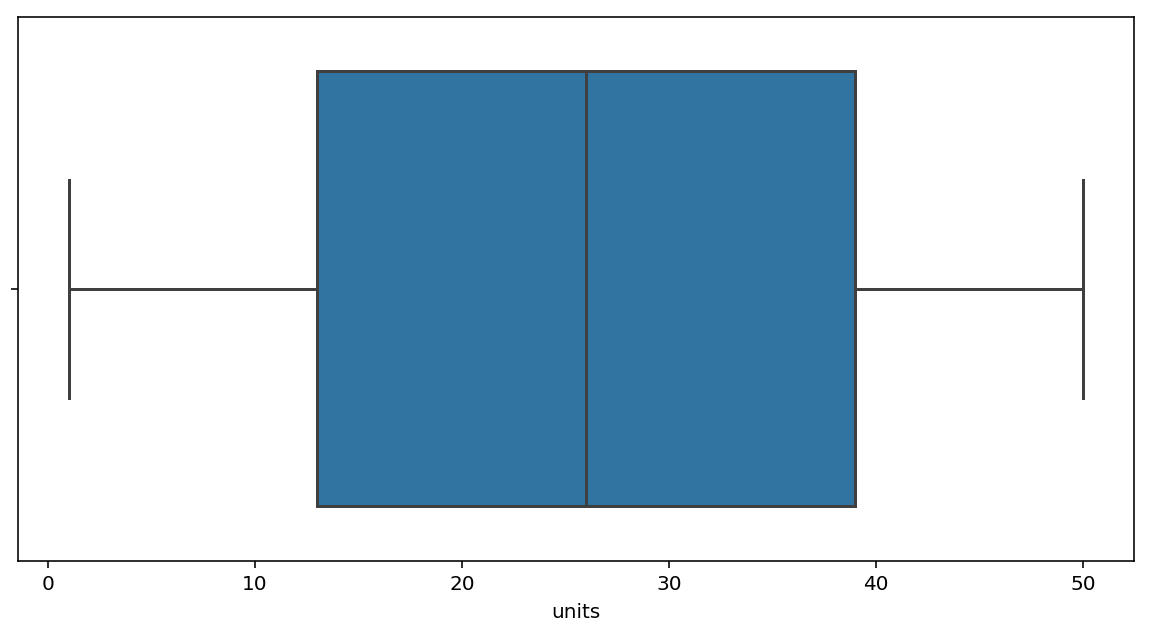

In [23]:
sns.boxplot(sales_50['units']);

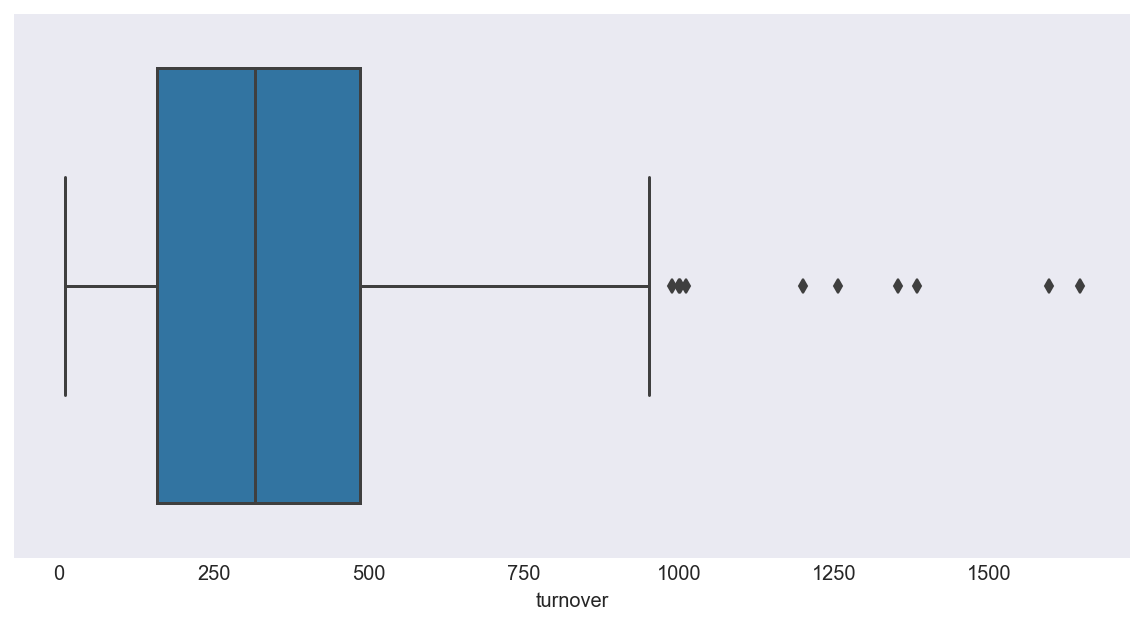

In [24]:
sns.set_style("dark")
sns.boxplot(sales_50['turnover']);

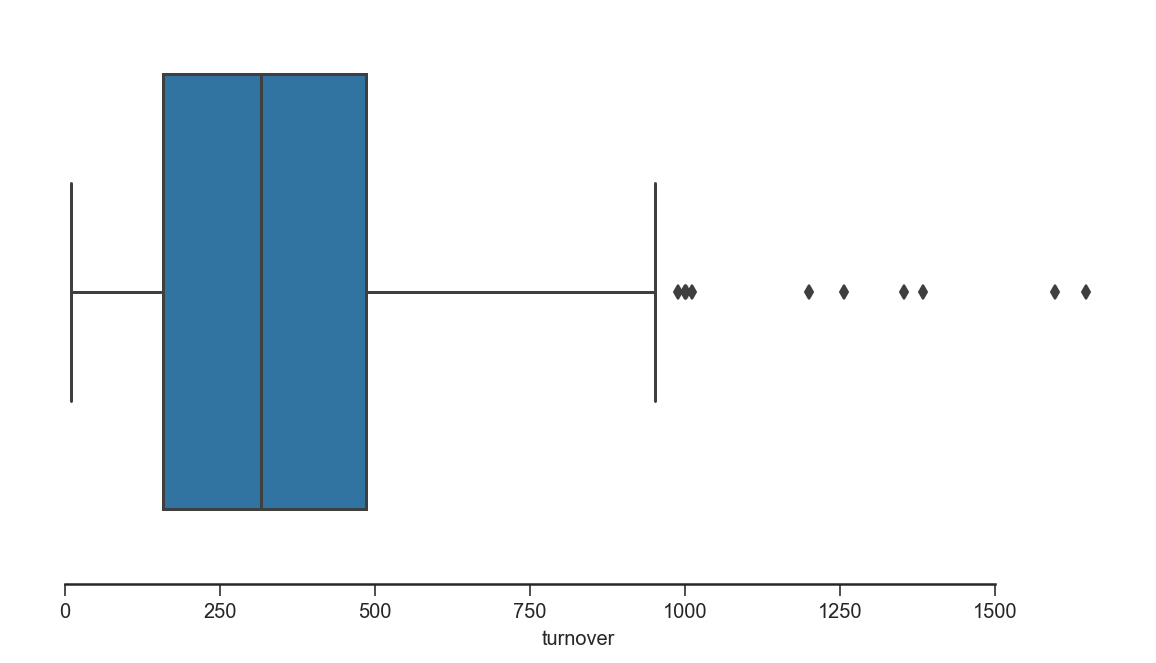

In [25]:
sns.set_style("ticks")
sns.boxplot(sales_50['turnover']);
sns.despine(offset=10, trim=True);

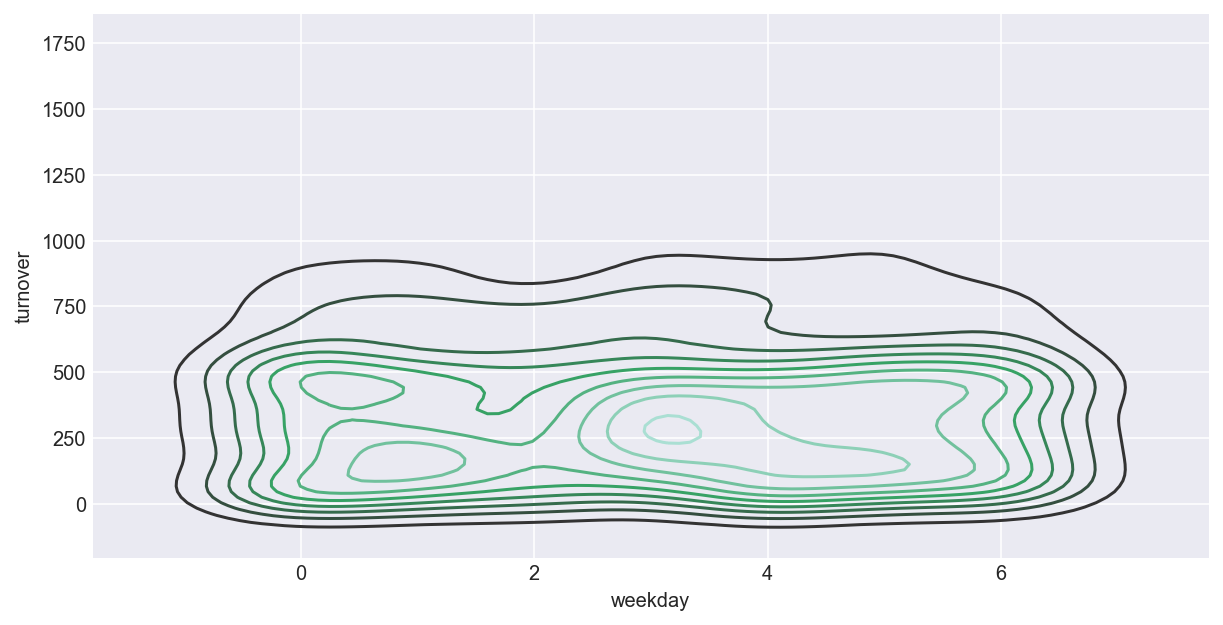

In [26]:
sns.set_style("darkgrid")
sns.kdeplot(sales_50['weekday'], sales_50['turnover']);

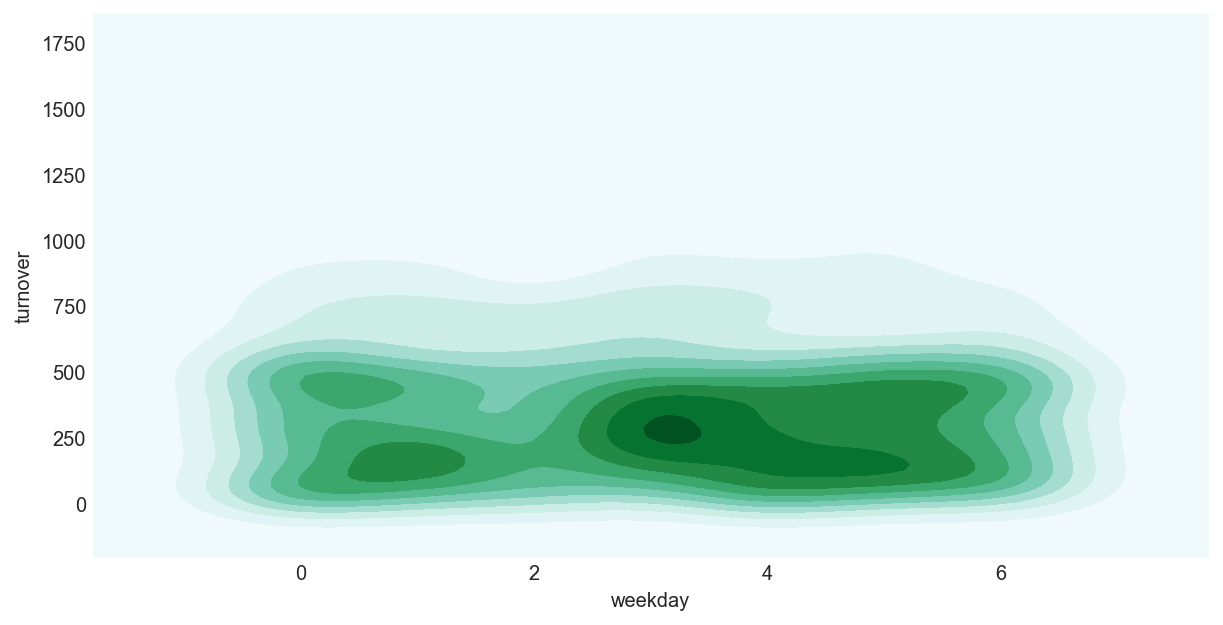

In [27]:
sns.set_style("darkgrid")
sns.kdeplot(sales_50['weekday'], sales_50['turnover'],
           {"xtick.major.size": 8, "ytick.major.size": 8});

Clustermap

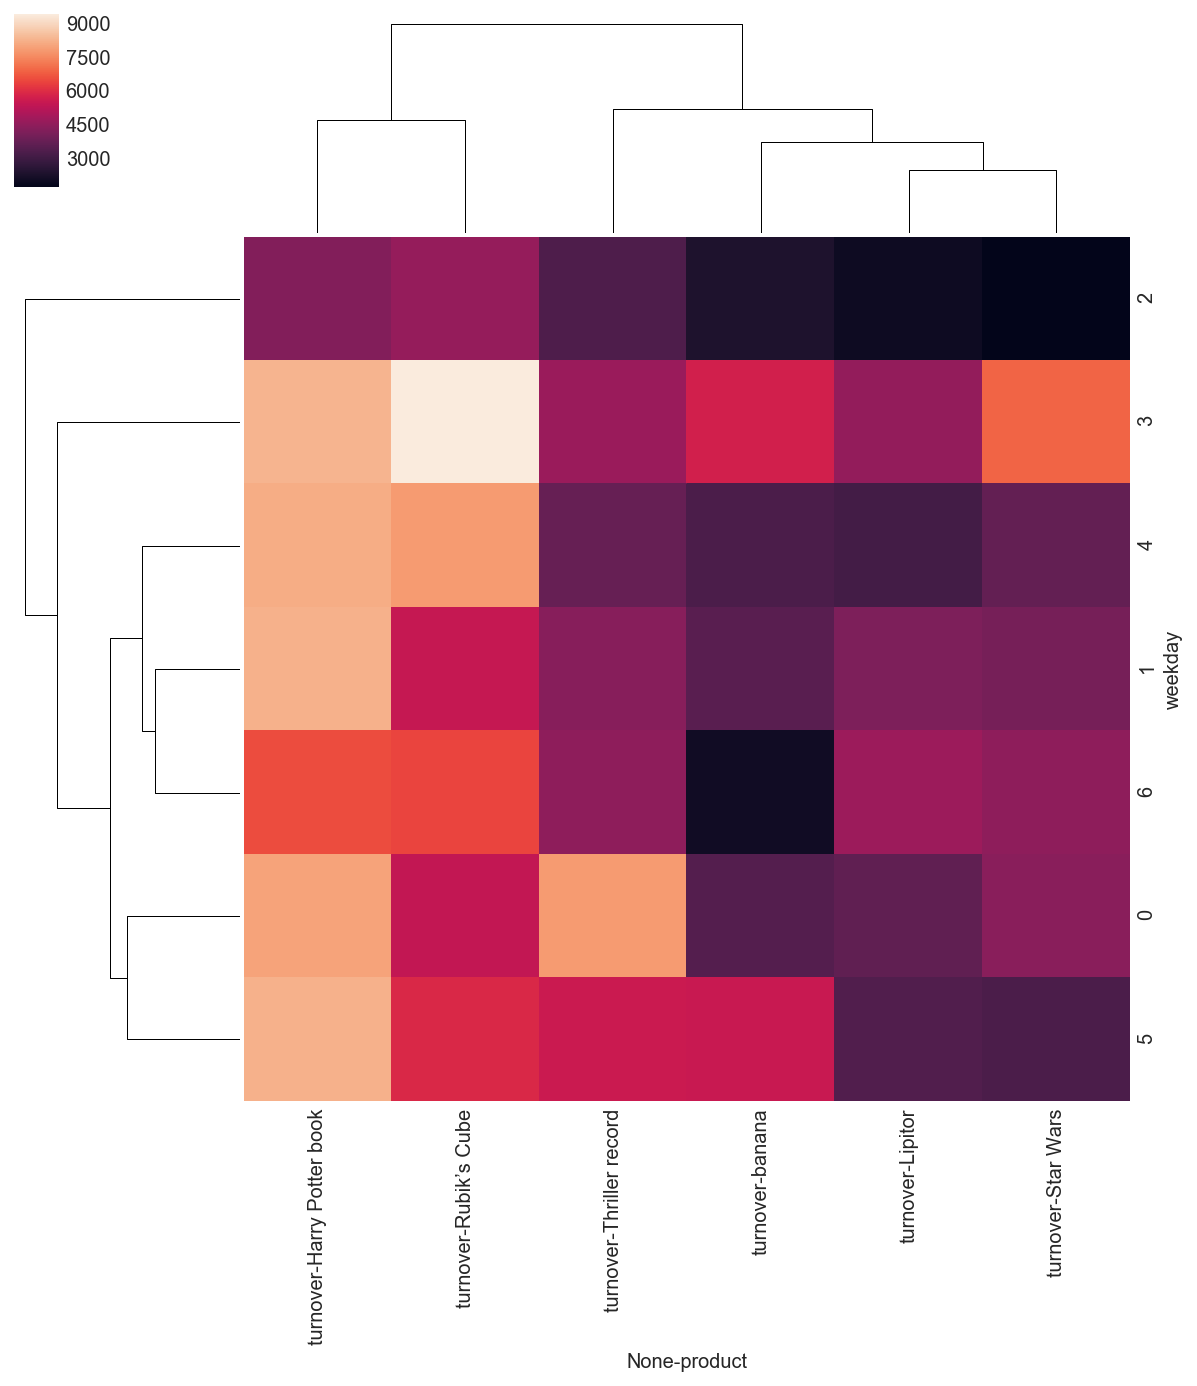

In [28]:
sns.clustermap(
    sales_data[sales_data['unitprice']<50][['weekday', 'product', 'turnover']]
    .groupby(['weekday', 'product']).sum().unstack());

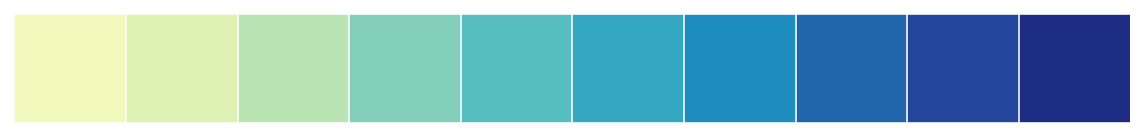

In [29]:
sns.palplot(sns.color_palette("YlGnBu", 10))

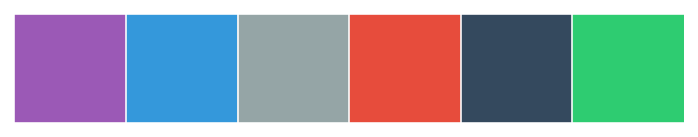

In [30]:
myplatte = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(myplatte)
sns.palplot(sns.color_palette())

In [31]:
sales_50.head()

,units,turnover,product,weekday
0,2,26.54,Thriller record,6
2,41,647.39,Rubik’s Cube,4
4,4,102.76,Harry Potter book,5
5,1,11.22,Lipitor,4
7,5,91.35,Thriller record,5


/Users/valerio/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


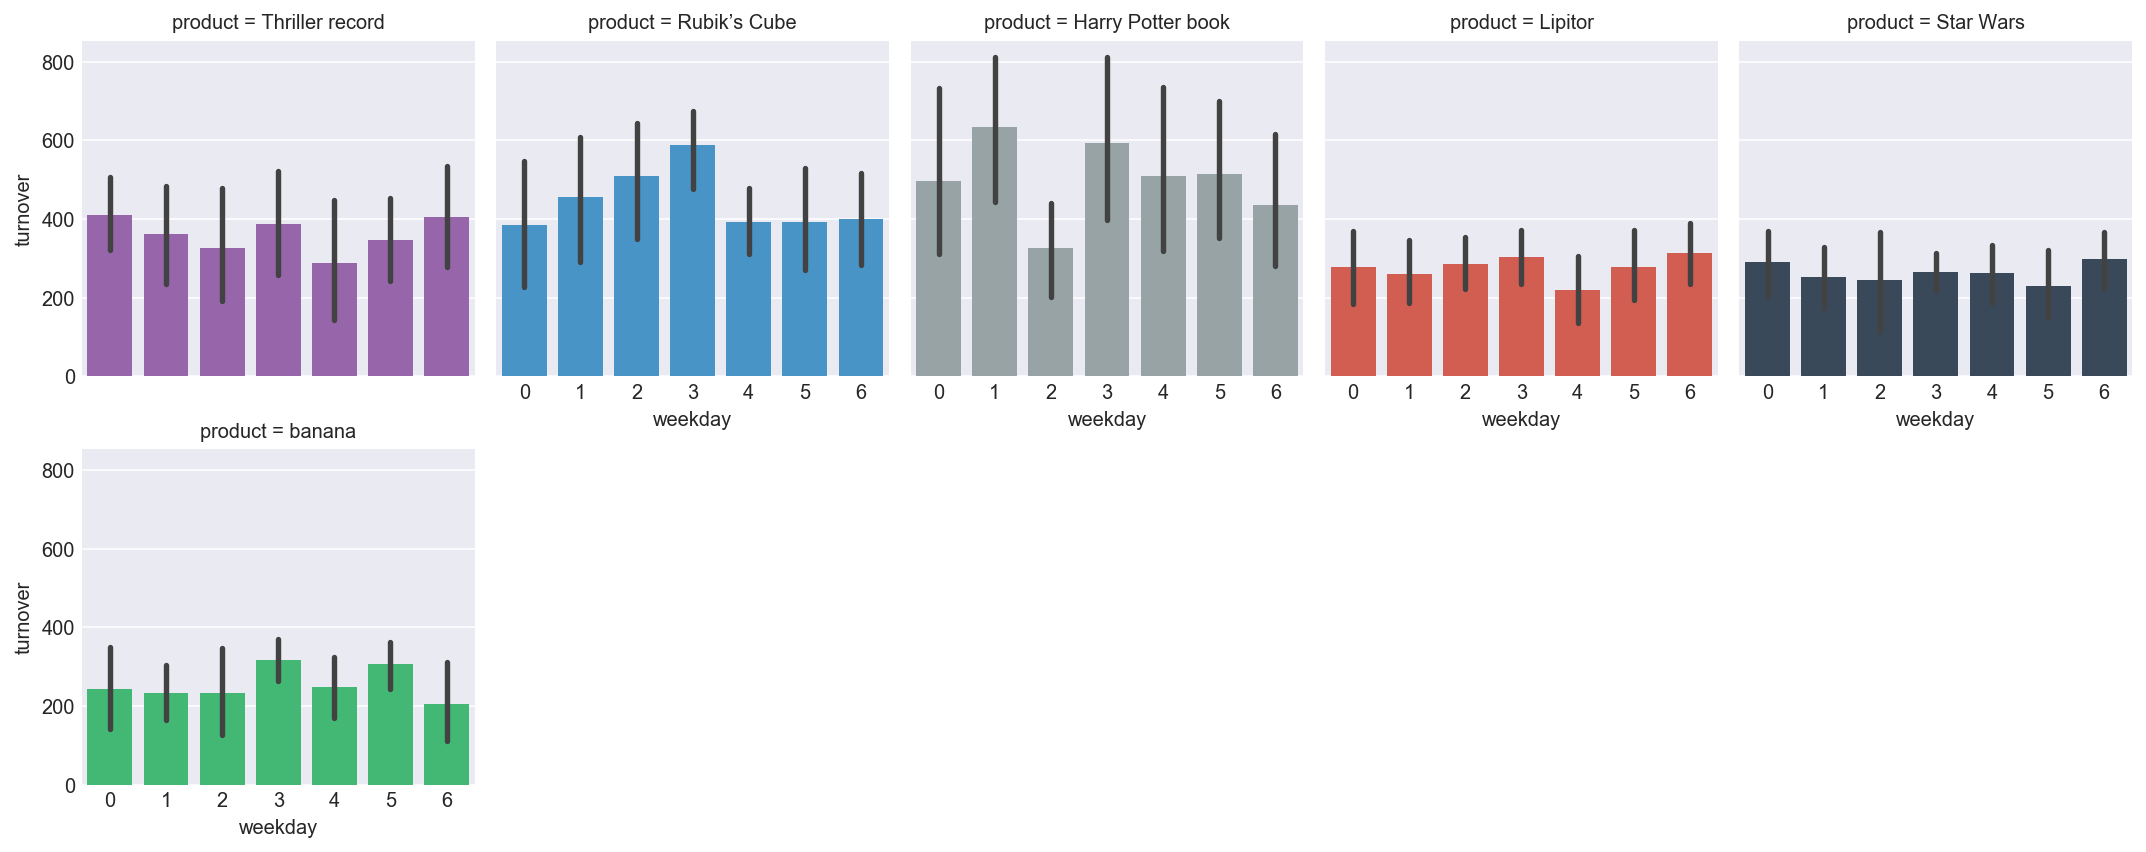

In [32]:
g = sns.FacetGrid(data=sales_50.dropna(), col='product', col_wrap=5, hue='product')
g.map(sns.barplot, "weekday", "turnover");

---

### Bokeh

Bokeh ist unabhängig von matplotlib und für interaktive Datenvisualisierungen in modernen Browsern gemacht.

In [33]:
from bokeh.plotting import figure, output_notebook, output_file, show

In [34]:
output_notebook()

Loading BokehJS ...

In [36]:
import numpy as np

from bokeh.plotting import figure, output_file, show

# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# output to static HTML file (with CDN resources)
# output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vectorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
#
# show the results
show(p)